In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 415kB/s eta 0:00:01
     |████████████████████████████████| 13.9MB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 4.8MB/s eta 0:00:01
     |████████████████████████████████| 11.0MB 1.4MB/s eta 0:00:01


In [2]:
!pip install mapclassify

     |████████████████████████████████| 51kB 284kB/s eta 0:00:011
  Created wheel for mapclassify: filename=mapclassify-2.2.0-cp37-none-any.whl size=47031 sha256=883e49a540f6262b5ae8253d5938782bc409747cb8f7cd02df2fa572ce8d3a7f
  Stored in directory: /Users/politicayredes/Library/Caches/pip/wheels/96/0c/c1/b2bce9fc10da2e6c6befc9fe5929adca7c71b7c4abd1fc42f0
Successfully built mapclassify


In [3]:
!pip install descartes

In [4]:
 import descartes

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches
import mapclassify

### Paquetes :
1) `Geopandas` es un paquete en Python para manejar bases de datos con información cartográfica (cordenadas). Es usado principalmente para graficar información de geoespacial

2) `mapclassify`nos permite clasificar información en clusters para luego poderlas graficar en las visualizaciones de mapas

### Análisis Geoespacial

En esta sesión trabajaremos en la creación de mapas y la visualización de datos en distribuciones geográficas. Esto nos permitirá hacer trabajos de cartografía análitica o simplemente visualizar mejor nuestros datos. 

Para esta sesión trabajaremos con datos del mundo y de Colombia.

PIB per capita en el Mundo

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [8]:
world["pib_per_capita"]=world["gdp_md_est"]/world["pop_est"]

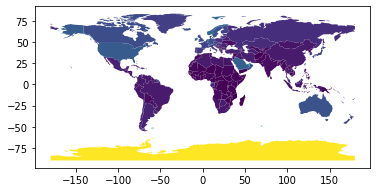

In [9]:
world.plot(column='pib_per_capita')

In [10]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [11]:
plt.rcParams['figure.figsize'] = [80, 30]

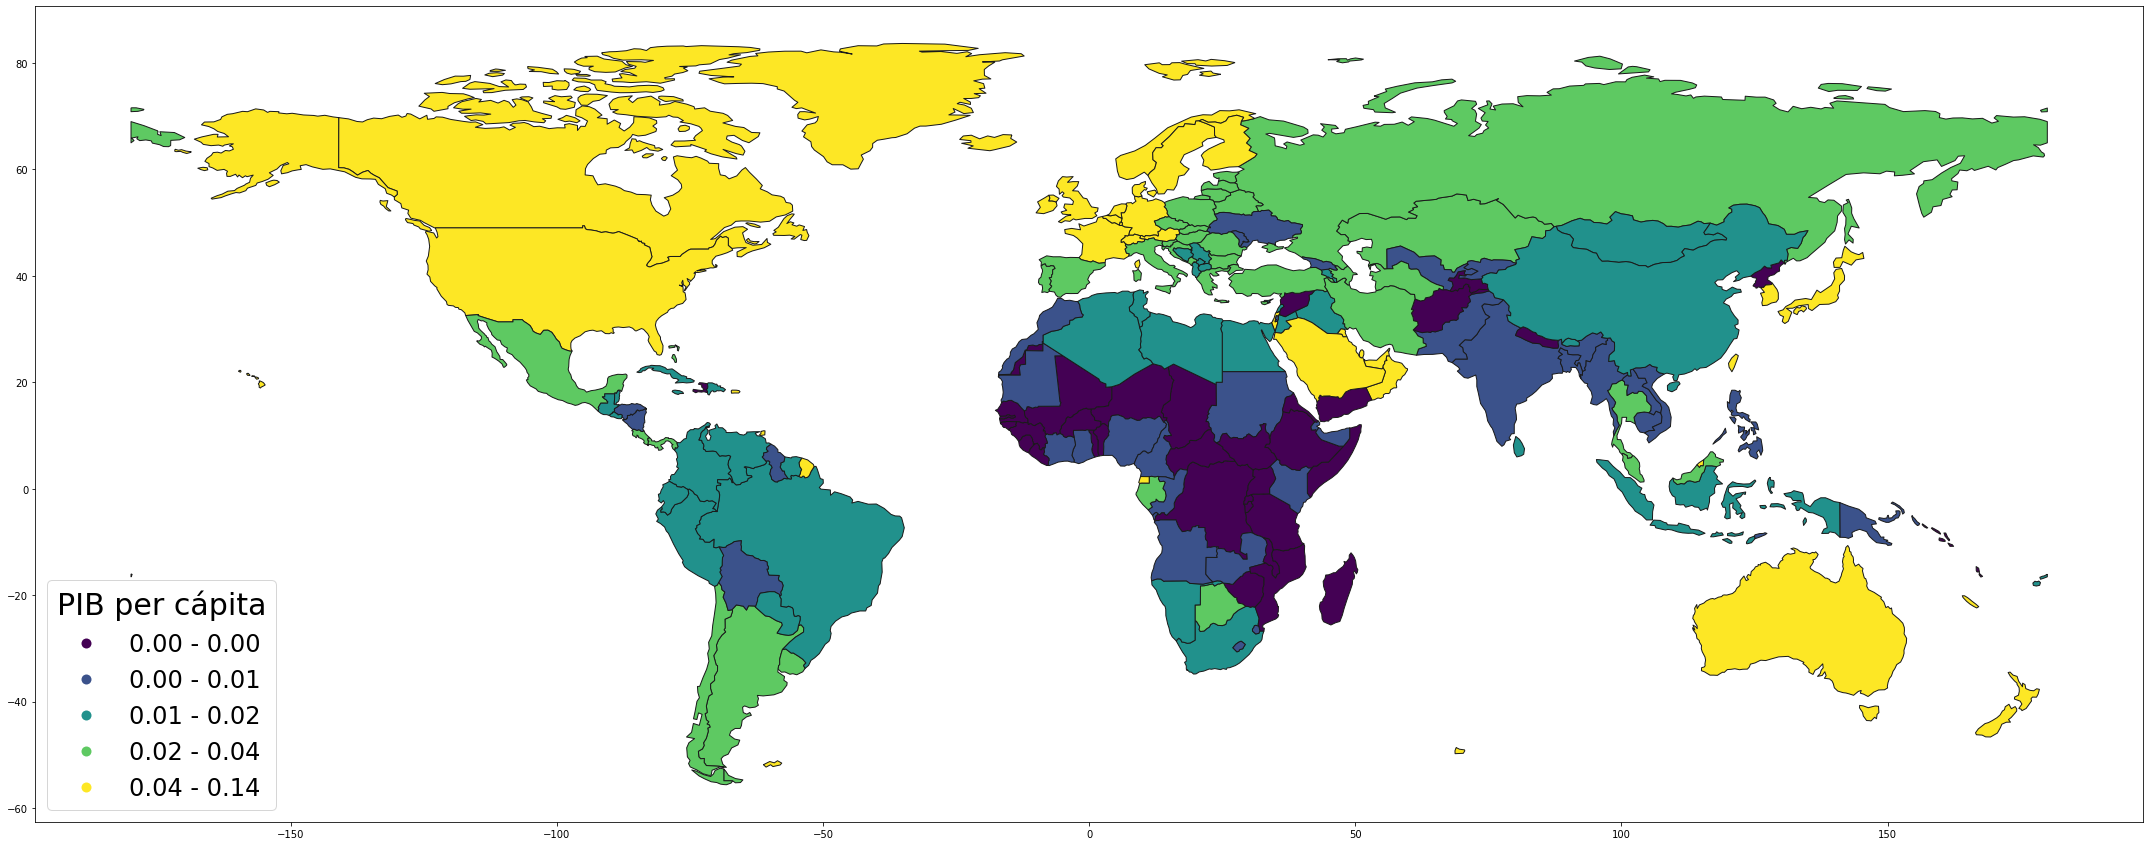

In [51]:
fig,ax= plt.subplots()
f=world.plot(column='pib_per_capita', linewidth=1,edgecolor="0.1",ax=ax, scheme='quantiles',legend=True,
            legend_kwds={'frameon': True, 'loc': 'lower left','fontsize': 24, 
                         "title": "PIB per cápita","title_fontsize": 30})


### Distribución geográfica del Plebicito por la Paz 2016 

La idea es tratar de examinar los resultados electorales del 2016 usando la cartografía analítica, una metólogia recuerrente en la Ciencia Política de analizar datos usando datos geoespaciales. Por ejemplo, está el estudio de clivajes partidistas en los pueblos hecha por Patricia Pinzón de Lewin (1989) o el reciente artículo del Profesor de la Universidad del Rosario Yann Basset sobre el tema del [plebicito](http://www.scielo.org.co/pdf/espo/n52/0121-5167-espo-52-00241.pdf)

1) Usaremos los [datos geográficos](https://sites.google.com/site/seriescol/shapes) hechos por Maurix Suarez


2) Usaremos los [datos electorales y otros] (https://github.com/john-guerra/resultadosPlebiscito/blob/master/plebiscito_Colombia_2016.csv) hecho por John Guerra

In [24]:
#Cargemos el archivo .shp, o el archivo geográfico
mpios = "./Shp/mpio.shp"

In [25]:
#Usaremos el paquete gpd para convertir el archivo .shp en un DataFrame
data = gpd.read_file(mpios)

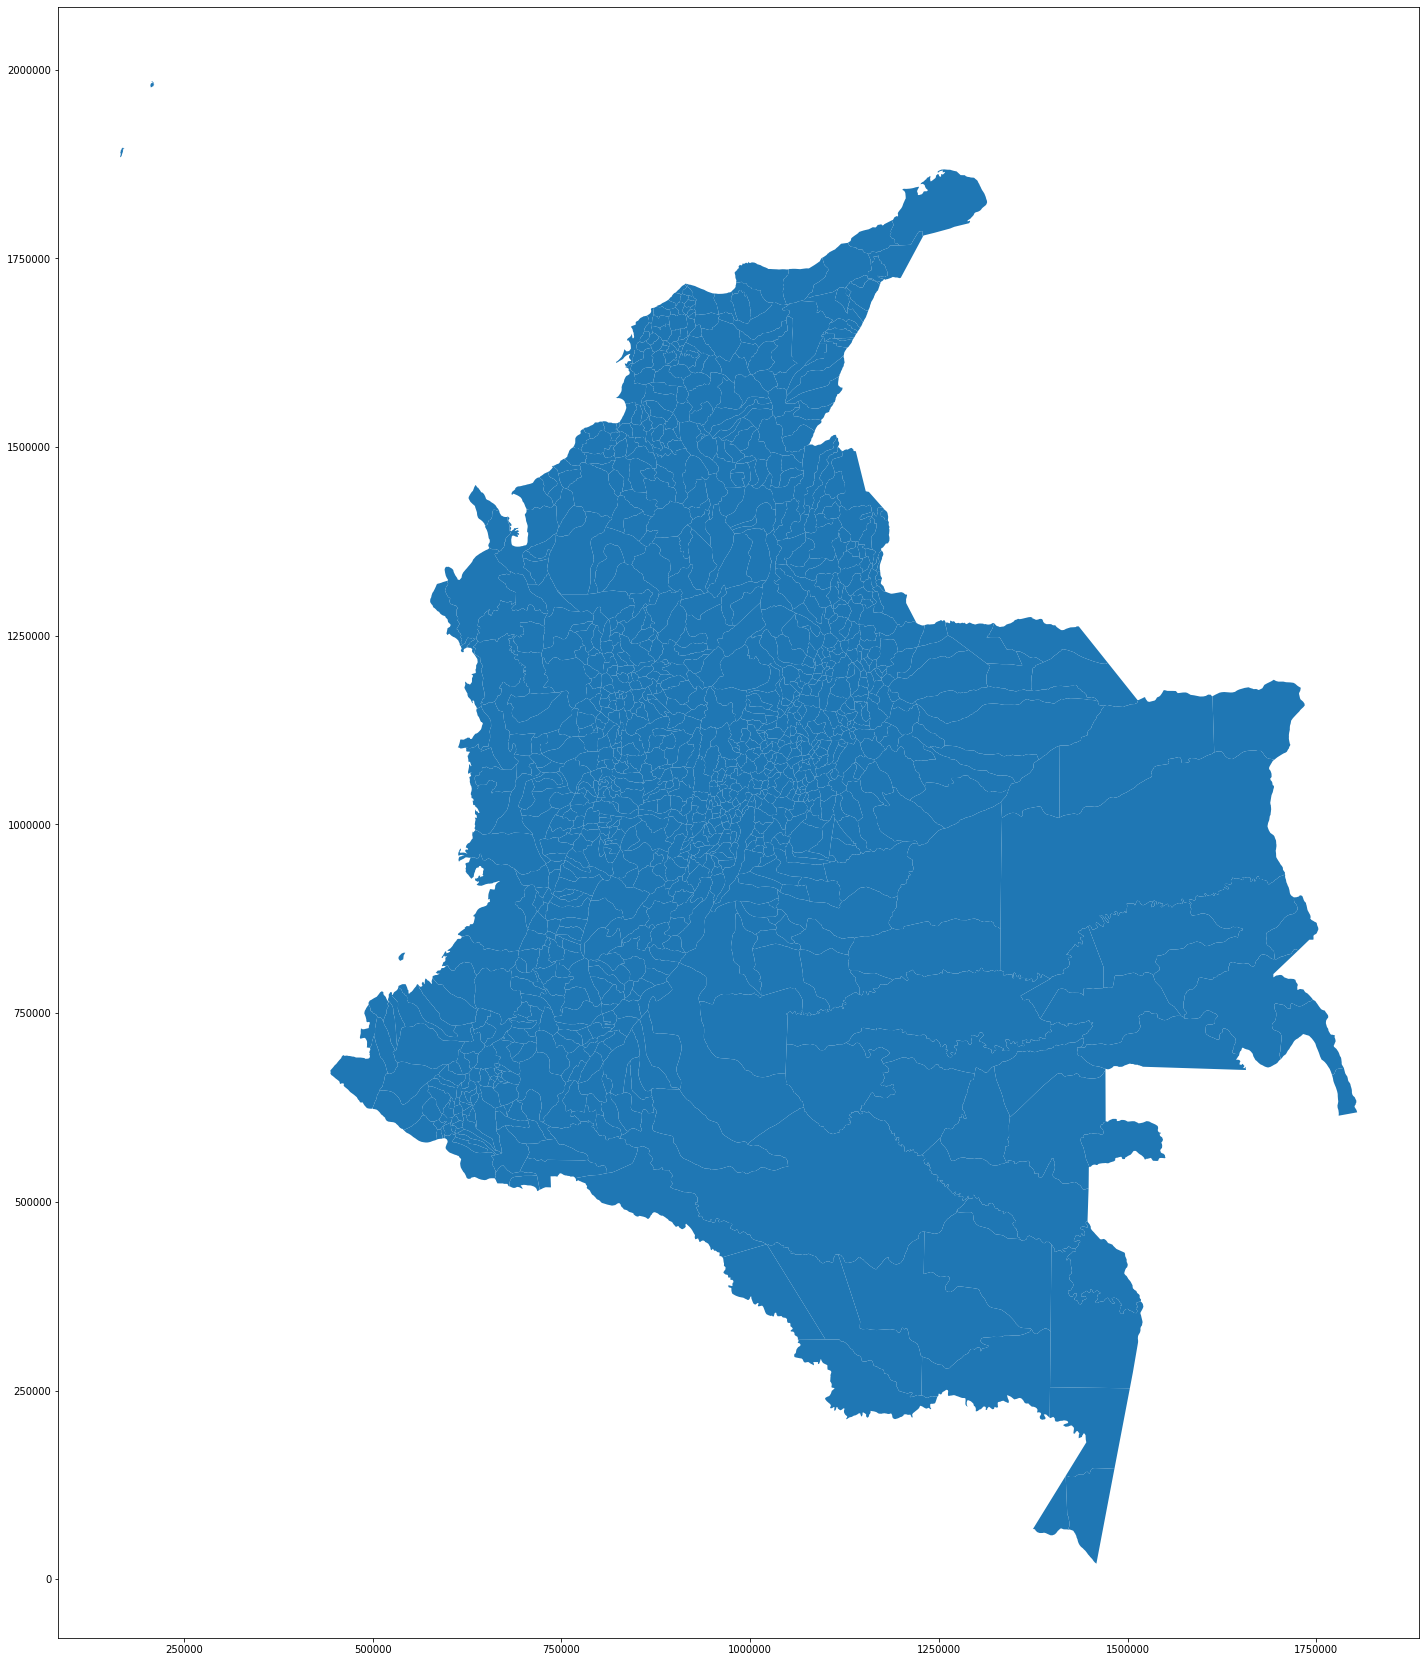

In [26]:
#Podemos visualizar el archivo con este comando
data.plot()

In [27]:
#Podemos ver que información contiene este Dataframe
data.head()

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,44847,ZONA06,DABAR,DABARZONA06,751676.579,"POLYGON ((1290154.980 1796649.425, 1270385.550..."
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,44560,ZONA06,DABAR,DABARZONA06,162466.283,"POLYGON ((1187687.339 1800431.820, 1188158.788..."
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,44430,ZONA06,DABAR,DABARZONA06,177993.385,"POLYGON ((1198031.055 1767210.476, 1212713.613..."
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,001,RIOHACHA,RIOHACHA,CM,44001,ZONA06,DABAR,DABARZONA06,310995.043,"POLYGON ((1156062.702 1755981.216, 1159630.667..."
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,090,DIBULLA,DIBULLA,CM,44090,ZONA06,DABAR,DABARZONA06,199986.641,"POLYGON ((1095571.713 1750924.096, 1097255.333..."


In [30]:
#Cargemos el archivo de datos elecotrales 
votaciones= pd.read_excel('./Plebicito_John_Guerra.xls', sep = ',',  header=0)

In [31]:
#Vemos los Datos
votaciones

,MPIOS,Municipio,Departamento,Votos para senado 2014,Porcentaje de √ìscar Ivan Zuluaga (1ra vuelta),Total (1ra vuelta),Participacion (1ra vuelta),Ganador (1ra vuelta),Porcentaje de √ìscar Ivan Zuluaga (2da vuelta),Total (2da vuelta),...,Votos por el Si,porcentaje_si,Votos validos,Votos totales,Cuantos salieron a votar,ind ruralidad 2014,Zonas de concentracion,Cultivos ilicitos,Hectareas de coca,Hectareas de amapola
0,5001,Medellin,Antioquia,430064,0.3848,700732,0.4961,Zuluaga,0.6304,709359,...,253548,37.02,684721,694784,46.06,0.0124,No,No,0.00,0
1,5002,Abejorral,Antioquia,4135,0.6252,4827,0.3231,Zuluaga,0.7854,6748,...,1296,38.10,3401,3647,23.87,0.6576,No,No,0.00,0
2,5004,Abriaqui,Antioquia,726,0.4076,709,0.3726,Zuluaga,0.6033,852,...,213,39.08,545,572,29.51,0.6487,No,No,0.00,0
3,5021,Alejandria,Antioquia,1675,0.2919,1720,0.3930,Santos,0.4434,2163,...,966,58.12,1662,1735,37.90,0.4809,No,No,0.00,0
4,5030,Amaga,Antioquia,5742,0.3336,7407,0.3545,Zuluaga,0.5328,8814,...,2084,33.48,6223,6370,28.91,0.4362,No,No,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,97889,Yavarate,Vaupes,63,0.1576,311,0.3129,Santos,0.2508,331,...,278,88.25,315,316,30.53,1.0000,No,No,0.00,0
1118,99001,Puerto Carre√±o,Vichada,5065,0.3801,4885,0.3127,Zuluaga,0.4967,5653,...,2185,46.15,4734,4820,27.64,0.1652,No,No,0.00,0
1119,99524,La Primavera,Vichada,3325,0.6878,2780,0.3866,Zuluaga,0.7447,3227,...,661,27.00,2448,2504,34.45,0.4528,No,No,0.00,0
1120,99624,Santa Rosalia,Vichada,1246,0.6377,1118,0.3865,Zuluaga,0.6667,1272,...,576,45.53,1265,1284,42.61,0.3525,No,No,0.00,0


In [32]:
#Usaremos el comando merge para unir dos bases de datos por un mismo identificador, Geodata debe ir a la izquierda
#merge = data.merge(votaciones, on='MPIOS')

In [33]:
#Nos toca cambiar el tipo de objeto
data['MPIOS']=data['MPIOS'].astype(int)

In [34]:
merge = data.merge(votaciones, on='MPIOS')

In [35]:
#Veamos como quedó
merge

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,...,Votos por el Si,porcentaje_si,Votos validos,Votos totales,Cuantos salieron a votar,ind ruralidad 2014,Zonas de concentracion,Cultivos ilicitos,Hectareas de coca,Hectareas de amapola
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,...,1713,50.81,3371,3434,3.38,0.9286,No,No,0.00,0
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,...,1768,55.49,3186,3260,6.20,0.5700,No,No,0.00,0
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,...,10766,52.95,20329,20773,17.26,0.3154,No,No,0.00,0
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,001,RIOHACHA,RIOHACHA,CM,...,17613,63.57,27705,28290,25.34,0.1520,No,No,0.00,0
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,090,DIBULLA,DIBULLA,CM,...,3306,71.63,4615,4732,23.02,0.8368,No,No,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,5.234873e+08,103625.415597,1120,282,27,CHOCO,450,MEDIO SAN JUAN,MEDIO SAN JUAN,CM,...,2580,86.25,2991,3081,41.21,0.6474,No,Si,134.81,0
1116,1.333941e+09,211788.556842,1122,361,05,ANTIOQUIA,480,MUTATA,MUTATA,CM,...,1846,64.50,2862,3030,22.23,0.7323,No,Si,1.18,0
1117,2.816016e+09,359760.445480,1123,287,27,CHOCO,150,CARMEN DEL DARIEN,CARMEN DEL DARIEN,CM,...,1290,95.69,1348,1368,24.70,0.7603,No,Si,48.14,0
1118,2.727328e+07,40602.945357,4,994,88,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,001,SAN ANDRES,SAN ANDRES,CM,...,4301,51.21,8398,8466,19.30,0.2606,No,No,0.00,0


In [36]:
for col in merge.columns: 
    print(col) 

AREA
PERIMETER
WCOLGEN02_
WCOLGEN021
DPTO
NOMBRE_DPT
MPIO
NOMBRE_MPI
NOMBRE_CAB
CLASEMUN
MPIOS
ZONA
OF_REG
REG_ZONAS
HECTARES
geometry
Municipio
Departamento
Votos para senado 2014
Porcentaje de √ìscar Ivan Zuluaga (1ra vuelta)
Total (1ra vuelta)
Participacion (1ra vuelta)
Ganador (1ra vuelta)
Porcentaje de √ìscar Ivan Zuluaga (2da vuelta)
Total (2da vuelta)
Participacion (2da vuelta)
Ganador
Censo electoral 2016
Actos terroristas
Amenaza
Desplazamiento
Homicidio
Secuestro
Vinculacion de Ni√±os y Adolescentes
Minas Antipersonal
Abandono o Despojo de Tierras
Afectado por el conflicto (Pares)
Afectado por el conflicto (Pares)2
Votos por el No
porcentaje_no
Votos por el Si
porcentaje_si
Votos validos
Votos totales
Cuantos salieron a votar
ind ruralidad 2014
Zonas de concentracion
Cultivos ilicitos
Hectareas de coca
Hectareas de amapola


In [37]:
#Ajustemos tamaño
plt.rcParams['figure.figsize'] = [50, 15]

Text(0.6, 0.05, 'Source: GitHub John Guerra')

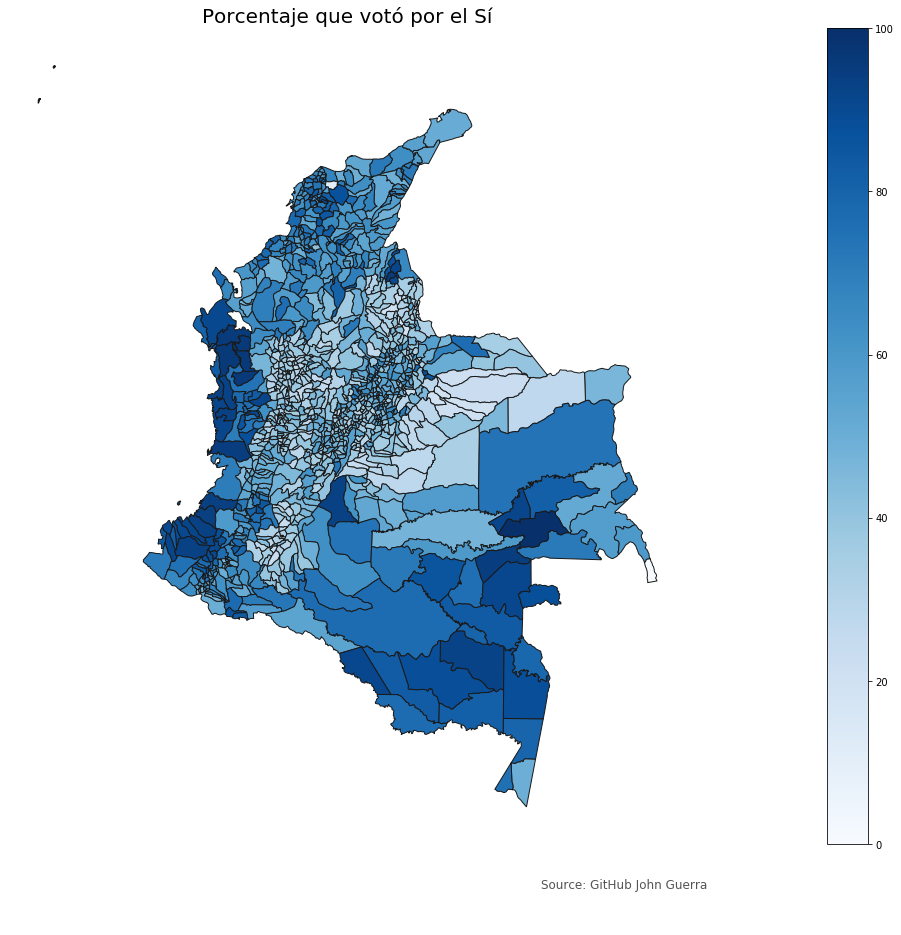

In [38]:
#Creemos la imagen
f=merge.plot(column="porcentaje_si", cmap="Blues", linewidth=1,edgecolor="0.1",legend=True)
f.axis('off')
f.set_title('Porcentaje que votó por el Sí', fontdict={'fontsize': '20', 'fontweight' : '3'})
f.annotate('Source: GitHub John Guerra', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

### Datos Filtrados por Departamento

Podemos crear una sub-base con los datos de un departamento cualquiera

In [39]:
merge2=merge.loc[merge["NOMBRE_DPT"]=="META"].copy()

##### Podemos agregar los nombres de cada municipio para identificar los municipios

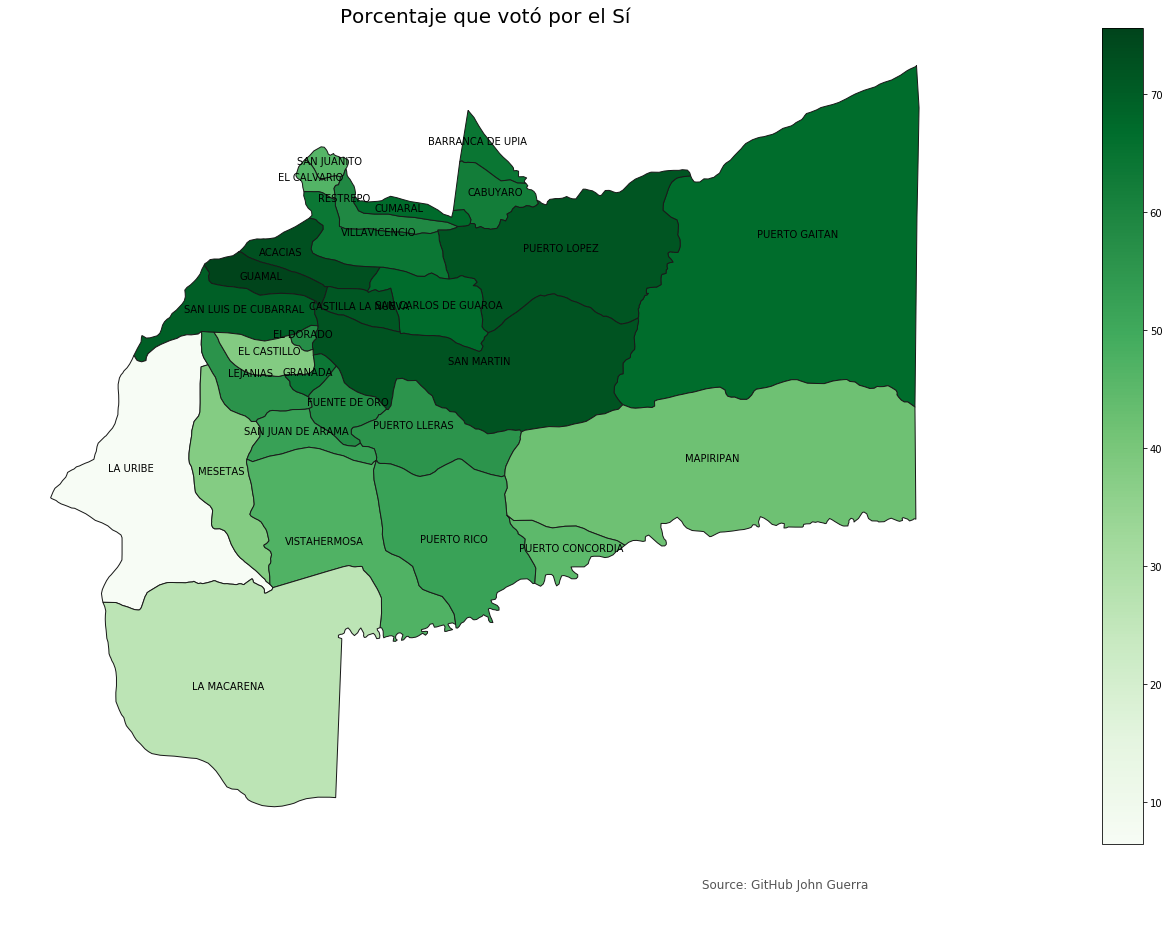

In [40]:
f=merge2.plot(column="porcentaje_no", cmap="Greens",linewidth=1,edgecolor="0.1",legend=True)
f.axis('off')
f.set_title('Porcentaje que votó por el Sí', fontdict={'fontsize': '20', 'fontweight' : '3'})
f.annotate('Source: GitHub John Guerra', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
merge2['coords'] = merge2['geometry'].apply(lambda x: x.representative_point().coords[:])
merge2['coords'] = [coords[0] for coords in merge2['coords']]
for id, row in merge2.iterrows():
    plt.annotate(s=row['NOMBRE_MPI'], xy=row['coords'],horizontalalignment='center')

In [41]:
#Guardemos la imagen
fig = f.get_figure()
fig.savefig("Choco.png")

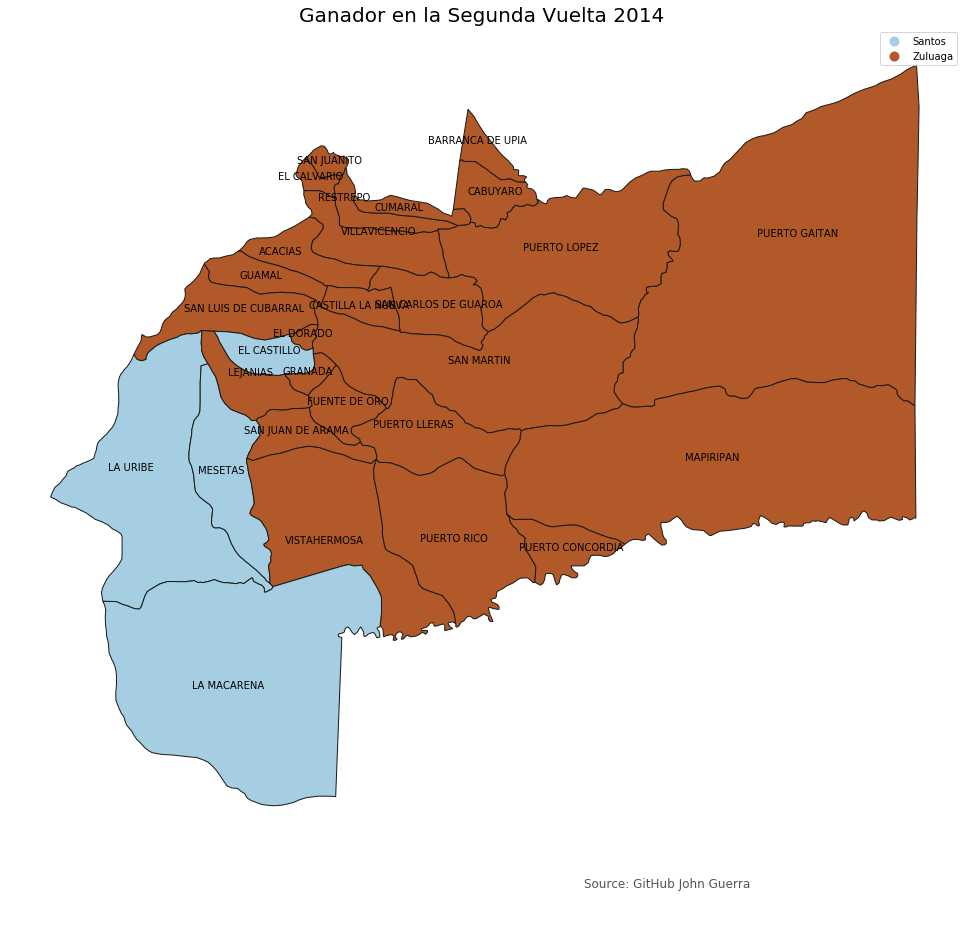

In [42]:
f=merge2.plot(column="Ganador", cmap="Paired",linewidth=1,edgecolor="0.1",legend=True)
f.axis('off')
f.set_title('Ganador en la Segunda Vuelta 2014 ', fontdict={'fontsize': '20', 'fontweight' : '3'})
f.annotate('Source: GitHub John Guerra', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
merge2['coords'] = merge2['geometry'].apply(lambda x: x.representative_point().coords[:])
merge2['coords'] = [coords[0] for coords in merge2['coords']]
for id, row in merge2.iterrows():
    plt.annotate(s=row['NOMBRE_MPI'], xy=row['coords'],horizontalalignment='center')

### Challenge: 
1) Explorar alguna otra variable y hacer alguna hipotesis, tipo cartografía análitica, sobre algún factor que pudo influir en el rechazo del Plebicito en algunas comunidades.